In [281]:
import os
total_images = 0
base_dir = r"/Users/fatimatuzzahra/Downloads/processed_slices/train"

for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.lower().endswith('.png'):
            total_images += 1

print("Total images in testing folder:", total_images)


Total images in testing folder: 84825


In [282]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image
import torch
import clip
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

In [283]:
base_dir = r"/Users/fatimatuzzahra/Downloads/processed_slices/train"
class_names = ['AD', 'CN', 'MCI']
total_images = 0

for class_name in class_names:
    path = os.path.join(base_dir, class_name, 'axial')
    if os.path.exists(path):
        num_files = len([f for f in os.listdir(path) if f.lower().endswith('.png')])
        print(f"{class_name} axial images: {num_files}")
        total_images += num_files
    else:
        print(f" Path not found: {path}")

print("Total axial images:", total_images)


AD axial images: 17575
CN axial images: 25795
MCI axial images: 41455
Total axial images: 84825


In [284]:
import os
import numpy as np
from tqdm import tqdm
import imgaug.augmenters as iaa
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input
# from tensorflow.keras.applications import DenseNet121.  # densenet code
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
import torchvision.transforms as T

# Extracting CLIP Image features
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess_clip = clip.load("ViT-B/32", device=device)

# Define your own compatible augmentations
augmenter = T.Compose([
    T.Resize(224),
    T.RandomHorizontalFlip(p=0.5),
    T.RandomRotation(10),
    T.GaussianBlur(kernel_size=3),
    T.ToTensor(),
    T.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))  # CLIP normalization
])

# EfficientNet base model
# base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224,224,3))
# # Step 3: Build feature extractor model (outputs 256-dim feature vectors)
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dropout(0.5)(x)
# x = Dense(256, activation='relu')(x)
# feature_extractor = Model(inputs=base_model.input, outputs=x)

# Step 4: Setup paths and label mapping
base_dir = r"/Users/fatimatuzzahra/Downloads/processed_slices/train"
classes = ['AD', 'CN', 'MCI']
label_map = {cls: idx for idx, cls in enumerate(classes)}

features, labels, image_paths = [], [], []

# Step 5: Loop through dataset and extract features
for cls in classes:
    print(cls)
    class_dir = os.path.join(base_dir, cls, 'axial')
    if not os.path.exists(class_dir):
        print(f"Directory not found: {class_dir}")
        continue

    for fname in tqdm(os.listdir(class_dir), desc=f"Processing {cls}"):
        if fname.lower().endswith('.png'):
            img_path = os.path.join(class_dir, fname)
            try:
                pil_img = Image.open(img_path).convert("RGB")
                
                # --------- Original Image ---------
                orig_img = preprocess_clip(pil_img).unsqueeze(0).to(device)
                with torch.no_grad():
                    orig_feat = model.encode_image(orig_img).cpu().numpy().flatten()
                features.append(orig_feat)
                labels.append(label_map[cls])
                image_paths.append(img_path)

                # --------- Augmented Image ---------
                aug_img_tensor = augmenter(pil_img).unsqueeze(0).to(device)
                with torch.no_grad():
                    aug_feat = model.encode_image(aug_img_tensor).cpu().numpy().flatten()
                features.append(aug_feat)
                labels.append(label_map[cls])
                image_paths.append(img_path + "_aug")

            except Exception as e:
                print(f"Failed to process {img_path}: {e}")

# Step 6: Save features, labels, and paths
features = np.array(features)
labels = np.array(labels)
image_paths = np.array(image_paths)

np.save("train_features_axial.npy", features)
np.save("train_labels_axial.npy", labels)
np.save("train_image_paths_axial.npy", image_paths)

print("Feature vectors saved:")
print("train_features_axial.npy")
print("train_labels_axial.npy")
print("train_image_paths_axial.npy")

KeyboardInterrupt: 

same process as above for validation data

In [16]:
import os
import numpy as np
from tqdm import tqdm
import imgaug.augmenters as iaa
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input
# from tensorflow.keras.applications import DenseNet121.  # densenet code
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
import torchvision.transforms as T

# Extracting CLIP Image features
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess_clip = clip.load("ViT-B/32", device=device)

# Define your own compatible augmentations
augmenter = T.Compose([
    T.Resize(224),
    T.RandomHorizontalFlip(p=0.5),
    T.RandomRotation(10),
    T.GaussianBlur(kernel_size=3),
    T.ToTensor(),
    T.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))  # CLIP normalization
])


# EfficientNet ase model
# base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224,224,3))
# # Step 3: Build feature extractor model (outputs 256-dim feature vectors)
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dropout(0.5)(x)
# x = Dense(256, activation='relu')(x)
# feature_extractor = Model(inputs=base_model.input, outputs=x)

# Step 4: Setup paths and label mapping
base_dir = r"/Users/fatimatuzzahra/Downloads/processed_slices/val"
classes = ['AD', 'CN', 'MCI']
label_map = {cls: idx for idx, cls in enumerate(classes)}

features, labels, image_paths = [], [], []

# Step 5: Loop through dataset and extract features
for cls in classes:
    print(cls)
    class_dir = os.path.join(base_dir, cls, 'axial')
    if not os.path.exists(class_dir):
        print(f"Directory not found: {class_dir}")
        continue

    for fname in tqdm(os.listdir(class_dir), desc=f"Processing {cls}"):
        if fname.lower().endswith('.png'):
            img_path = os.path.join(class_dir, fname)
            try:
                img = preprocess_clip(Image.open(img_path)).unsqueeze(0).to(device)
                with torch.no_grad():
                    feat = model.encode_image(img)
                    feat = feat.cpu().numpy().flatten()
                features.append(feat)
                labels.append(label_map[cls])
                image_paths.append(img_path)
            except Exception as e:
                print(f"Failed: {img_path}, {e}")

# Step 6: Save features, labels, and paths
features = np.array(features)
labels = np.array(labels)
image_paths = np.array(image_paths)

np.save("val_features_axial.npy", features)
np.save("val_labels_axial.npy", labels)
np.save("val_image_paths_axial.npy", image_paths)

print("Feature vectors saved:")
print("val_features_axial.npy")
print("val_labels_axial.npy")
print("val_image_paths_axial.npy")

AD


Processing AD: 100%|██████████| 1870/1870 [00:57<00:00, 32.33it/s]


CN


Processing CN: 100%|██████████| 2585/2585 [01:20<00:00, 32.01it/s]


MCI


Processing MCI: 100%|██████████| 3960/3960 [02:03<00:00, 32.17it/s]

Feature vectors saved:
val_features_axial.npy
val_labels_axial.npy
val_image_paths_axial.npy


In [285]:
features = np.load("train_features_axial.npy")       # Shape: (84755, 256)
print(features.shape)
labels = np.load("train_labels_axial.npy")           # Shape: (84755,)
print(labels.shape)
image_paths = np.load("train_image_paths_axial.npy") # Shape: (84755,)
print(image_paths.shape)


(169650, 512)
(169650,)
(169650,)


loading and printing features and other things for validation data as well

In [286]:
features = np.load("val_features_axial.npy")       # Shape: (84755, 256)
print(features.shape)
labels = np.load("val_labels_axial.npy")           # Shape: (84755,)
print(labels.shape)
image_paths = np.load("val_image_paths_axial.npy") # Shape: (84755,)
print(image_paths.shape)


(8415, 512)
(8415,)
(8415,)


In [287]:
# Load the .npy files
import pandas as pd
features = np.load("train_features_axial.npy")       # Shape: (84755, 256)
labels = np.load("train_labels_axial.npy")           # Shape: (84755,)

# Combine features and labels
combined = np.hstack((features, labels.reshape(-1, 1)))  # Shape: (84755, 257)

# Create a DataFrame
df = pd.DataFrame(combined)

# Optionally name columns

feature_columns = [f"f{i}" for i in range(features.shape[1])]
df.columns = feature_columns + ["label"]

# Save to CSV
df.to_csv("train_axial_features_and_labels_only.csv", index=False)

print(" Saved: train_axial_features_and_labels_only.csv")


 Saved: train_axial_features_and_labels_only.csv


same process for validation set

In [288]:
# Load the .npy files
features = np.load("val_features_axial.npy")       # Shape: (84755, 256)
labels = np.load("val_labels_axial.npy")           # Shape: (84755,)

# Combine features and labels
combined = np.hstack((features, labels.reshape(-1, 1)))  # Shape: (84755, 257)

# Create a DataFrame
df = pd.DataFrame(combined)

# Optionally name columns
feature_columns = [f"f{i}" for i in range(features.shape[1])]
df.columns = feature_columns + ["label"]

# Save to CSV
df.to_csv("val_axial_features_and_labels_only.csv", index=False)

print(" Saved: val_axial_features_and_labels_only.csv")


 Saved: val_axial_features_and_labels_only.csv


In [289]:
import numpy as np
from tqdm import tqdm
import os

# Load image feature data
image_features = np.load("train_features_axial.npy")       # (84755, 256)
image_labels = np.load("train_labels_axial.npy")           # (84755,)
image_paths = np.load("train_image_paths_axial.npy")       # (84755,)

# Load cleaned textual embeddings and IDs
textual_embeddings = np.load("text_embeddings_cleaned.npy")   # (2294, 384)
text_ids = np.load("text_image_ids.npy", allow_pickle=True)      # (2294,)

# Step 1: Build a lookup from Image ID → text embedding
text_lookup = {id_: emb for id_, emb in zip(text_ids, textual_embeddings)}

# Step 2: Match each image with its text embedding (based on ID prefix)
fused_features = []
fused_labels = []
matched_count = 0

for i, (img_feat, label, path) in enumerate(tqdm(zip(image_features, image_labels, image_paths), total=len(image_paths))):
    filename = os.path.basename(path)  # e.g., 'I31143_AD_axial_55.png'
    img_id = filename.split('_')[0]             # 'I31143'

    if img_id in text_lookup:
        text_feat = text_lookup[img_id]
        fused = np.concatenate([img_feat, text_feat])  # shape (640,)
        fused_features.append(fused)
        fused_labels.append(label)
        matched_count += 1

print(f" Matched samples: {matched_count}")

# Convert to arrays and save
fused_features = np.array(fused_features)
fused_labels = np.array(fused_labels)

np.save("train_fused_features_clean.npy", fused_features)
np.save("train_fused_labels_clean.npy", fused_labels)

print(" Final train fused shape:", fused_features.shape)
print(" Labels shape:", fused_labels.shape)


100%|██████████| 169650/169650 [00:00<00:00, 418688.29it/s]


 Matched samples: 169650
 Final train fused shape: (169650, 1024)
 Labels shape: (169650,)


fusion for the validation set is done below

In [290]:
import numpy as np
from tqdm import tqdm
import os

# Load image feature data
image_features = np.load("val_features_axial.npy")       # (84755, 256)
image_labels = np.load("val_labels_axial.npy")           # (84755,)
image_paths = np.load("val_image_paths_axial.npy")       # (84755,)

# Load cleaned textual embeddings and IDs
textual_embeddings = np.load("text_embeddings_cleaned.npy")   # (2294, 384)
text_ids = np.load("text_image_ids.npy", allow_pickle=True)      # (2294,)

# Step 1: Build a lookup from Image ID → text embedding
text_lookup = {id_: emb for id_, emb in zip(text_ids, textual_embeddings)}

# Step 2: Match each image with its text embedding (based on ID prefix)
fused_features = []
fused_labels = []
matched_count = 0

for i, (img_feat, label, path) in enumerate(tqdm(zip(image_features, image_labels, image_paths), total=len(image_paths))):
    filename = os.path.basename(path)  # e.g., 'I31143_AD_axial_55.png'
    img_id = filename.split('_')[0]             # 'I31143'

    if img_id in text_lookup:
        text_feat = text_lookup[img_id]
        fused = np.concatenate([img_feat, text_feat])  # shape (640,)
        fused_features.append(fused)
        fused_labels.append(label)
        matched_count += 1

print(f" Matched samples: {matched_count}")

# Convert to arrays and save
fused_features = np.array(fused_features)
fused_labels = np.array(fused_labels)

np.save("val_fused_features_clean.npy", fused_features)
np.save("val_fused_labels_clean.npy", fused_labels)

print(" Final val fused shape:", fused_features.shape)
print(" Labels shape:", fused_labels.shape)


100%|██████████| 8415/8415 [00:00<00:00, 277494.40it/s]

 Matched samples: 8415
 Final val fused shape: (8415, 1024)
 Labels shape: (8415,)


In [291]:
import numpy as np
import pandas as pd

# Load
X = np.load("train_fused_features_clean.npy")
y = np.load("train_fused_labels_clean.npy")

# Combine into DataFrame
df = pd.DataFrame(X)
df["label"] = y

# Save to CSV
df.to_csv("train_fused_embeddings_with_labels.csv", index=False)
print(" Saved: train_fused_embeddings_with_labels.csv")


KeyboardInterrupt: 

savinf into csv the validation fused sets

In [12]:
import numpy as np
import pandas as pd

# Load
X = np.load("val_fused_features_clean.npy")
y = np.load("val_fused_labels_clean.npy")

# Combine into DataFrame
df = pd.DataFrame(X)
df["label"] = y

# Save to CSV
df.to_csv("val_fused_embeddings_with_labels.csv", index=False)
print(" Saved: val_fused_embeddings_with_labels.csv")


 Saved: val_fused_embeddings_with_labels.csv


saving image and textual data separately for training dataset

In [13]:
import numpy as np

# Load fused embeddings
fused = np.load("train_fused_features_clean.npy")  # (84755, 640)

# Split features
image_features = fused[:, :256]   # CNN-based
text_features  = fused[:, 256:]   # Sentence-transformer-based

# Save separately
np.save("train_image_features_only.npy", image_features)
np.save("train_text_features_only.npy", text_features)

print(" Saved:")
print("  train_image_features_only.npy (shape:", image_features.shape, ")")
print("  train_text_features_only.npy  (shape:", text_features.shape, ")")


 Saved:
  train_image_features_only.npy (shape: (169650, 256) )
  train_text_features_only.npy  (shape: (169650, 768) )


saving image and textual data separately for validation dataset

In [14]:
import numpy as np

# Load fused embeddings
fused = np.load("val_fused_features_clean.npy")  # (84755, 640)

# Split features
image_features = fused[:, :256]   # CNN-based
text_features  = fused[:, 256:]   # Sentence-transformer-based

# Save separately
np.save("val_image_features_only.npy", image_features)
np.save("val_text_features_only.npy", text_features)

print(" Saved:")
print("  val_image_features_only.npy (shape:", image_features.shape, ")")
print("  val_text_features_only.npy  (shape:", text_features.shape, ")")


 Saved:
  val_image_features_only.npy (shape: (8415, 256) )
  val_text_features_only.npy  (shape: (8415, 768) )


the code below is added just to save the progress

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Step 1: Load training set fused features and labels
X_train = np.load("train_fused_features_clean.npy")   # Shape: (84755, 640)
y_train = np.load("train_fused_labels_clean.npy")     # Shape: (84755,)

# Step 2: Load validation set fused features and labels
X_val = np.load("val_fused_features_clean.npy")
y_val = np.load("val_fused_labels_clean.npy")

# 🔹 Step 2: Train/test split (not used for testing file)
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

# 🔹 Step 3: Define and train MLP (no need of fitting again in test set)
mlp = MLPClassifier(
    hidden_layer_sizes=(512, 256, 64),   # You can adjust the architecture
    activation='relu',
    learning_rate_init=0.0006,
    solver='adam',
    max_iter=50,          # Increase to 100–300 for better results if time allows
    random_state=42,
    verbose=True
)
mlp.fit(X_train, y_train)

# 🔹 Step 4: Predict and evaluate
y_pred = mlp.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\n MLP Accuracy: {acc:.4f}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=["AD", "CN", "MCI"]))

# 🔹 Step 5: Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=["AD", "CN", "MCI"], yticklabels=["AD", "CN", "MCI"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(" Confusion Matrix - MLP (Fused Features)")
plt.tight_layout()
plt.show()


In [292]:
class MLPWithDropout(nn.Module):
    def __init__(self, input_dim):
        super(MLPWithDropout, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.net(x)

# Example usage:
input_dim = X_train.shape[1]
model = MLPWithDropout(input_dim).to(device)

Epoch 1/100, Train Loss: 0.6879, Val Loss: 0.6882
Epoch 2/100, Train Loss: 0.6743, Val Loss: 0.6816
Epoch 3/100, Train Loss: 0.6633, Val Loss: 0.6753
Epoch 4/100, Train Loss: 0.6532, Val Loss: 0.6664
Epoch 5/100, Train Loss: 0.6443, Val Loss: 0.6670
Epoch 6/100, Train Loss: 0.6368, Val Loss: 0.6614
Epoch 7/100, Train Loss: 0.6298, Val Loss: 0.6631
Epoch 8/100, Train Loss: 0.6230, Val Loss: 0.6629
Epoch 9/100, Train Loss: 0.6167, Val Loss: 0.6596
Epoch 10/100, Train Loss: 0.6107, Val Loss: 0.6616
Epoch 11/100, Train Loss: 0.6048, Val Loss: 0.6606
Epoch 12/100, Train Loss: 0.5991, Val Loss: 0.6572
Epoch 13/100, Train Loss: 0.5942, Val Loss: 0.6685
Epoch 14/100, Train Loss: 0.5899, Val Loss: 0.6608
Epoch 15/100, Train Loss: 0.5845, Val Loss: 0.6665
Epoch 16/100, Train Loss: 0.5806, Val Loss: 0.6641
Epoch 17/100, Train Loss: 0.5752, Val Loss: 0.6597
⏹️ Early stopping triggered at epoch 17
📊 Training Accuracy: 0.7344
✅ Validation Accuracy: 0.6152
Classification Report:
               precis

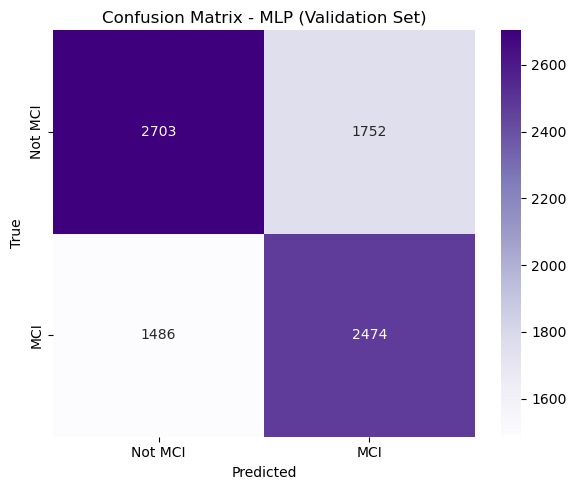

In [322]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import torch.nn as nn
from sklearn.utils.class_weight import compute_sample_weight
from imblearn.over_sampling import SMOTE
import torch 
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler

# Load data
X_train = np.load("train_image_features_only.npy")
y_train = np.load("train_fused_labels_clean.npy")
X_val = np.load("val_image_features_only.npy")
y_val = np.load("val_fused_labels_clean.npy")

y_train = np.where(y_train == 2, 1, 0)
y_val = np.where(y_val == 2, 1, 0)

# Optional: if your MLP has 1024 input, pad image/text features accordingly
# assert X_train.shape[1] == 1024

# Scale inputs
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_bal, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_bal, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

# Create datasets and dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128)



input_dim = X_train.shape[1]  # or manually set to 256 for image-only
model = MLPWithDropout(input_dim).to(device).to("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Early stop[ping variables
num_epochs = 100
patience = 5  # how many epochs to wait before early stopping

train_losses = []
val_losses = []

best_val_loss = float("inf")
early_stop_epoch = -1
epochs_no_improve = 0
best_model_state = None
device = "cuda" if torch.cuda.is_available() else "cpu"


for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # ---------------- Validation and Early Stopping ----------------
    model.eval()
    val_loss = 0.0
    y_val_preds = []
    y_val_true = []

    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            out = model(xb)
            loss = criterion(out, yb.unsqueeze(1).float())
            val_loss += loss.item()
            preds = (torch.sigmoid(out).squeeze() > 0.5).int()
            y_val_preds.extend(preds.cpu().numpy())
            y_val_true.extend(yb.cpu().numpy())

    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_no_improve = 0
        early_stop_epoch = epoch
        best_model_state = model.state_dict()

    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            early_stop_epoch = epoch  # ⏹️ Where stopping actually happens
            print(f"⏹️ Early stopping triggered at epoch {epoch+1}")
            break
# 🔹 Evaluate on Training Set
model.eval()
y_train_preds = []
y_train_true = []
with torch.no_grad():
    for xb, yb in train_loader:
        xb = xb.to(device)
        out = model(xb)
        preds = (torch.sigmoid(out).squeeze() > 0.5).int()  
        y_train_preds.extend(preds.cpu().numpy())
        y_train_true.extend(yb.numpy())

    # Training Metrics
    train_acc = accuracy_score(y_train_true, y_train_preds)
    print(f"📊 Training Accuracy: {train_acc:.4f}")

# Restore best model
model.load_state_dict(best_model_state)

# Final evaluation on validation set
val_acc = accuracy_score(y_val_true, y_val_preds)
print(f"✅ Validation Accuracy: {val_acc:.4f}")
print("Classification Report:\n", classification_report(y_val_true, y_val_preds, target_names=["Not MCI", "MCI"]))

cm = confusion_matrix(y_val_true, y_val_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=["Not MCI", "MCI"], yticklabels=["Not MCI", "MCI"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - MLP (Validation Set)")
plt.tight_layout()
plt.show()

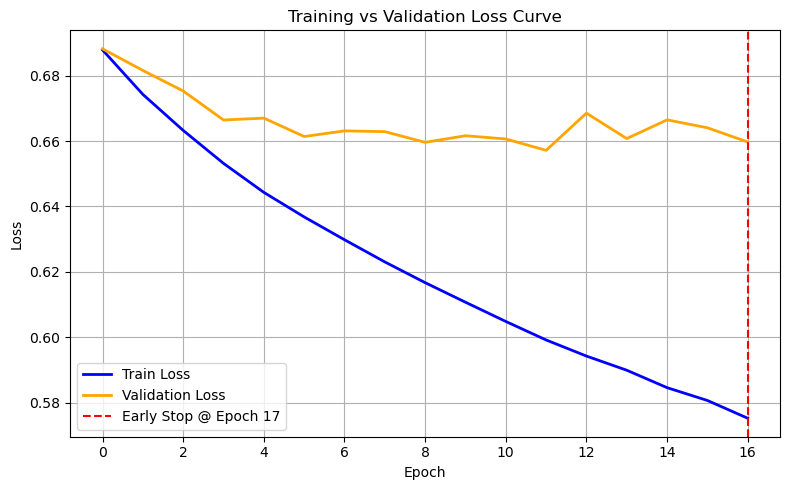

In [323]:
# 🔻 Loss Curve with Early Stopping Marker
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Train Loss', color='blue', linewidth=2)
plt.plot(val_losses, label='Validation Loss', color='orange', linewidth=2)

# Mark early stopping epoch
if early_stop_epoch != -1:
    plt.axvline(early_stop_epoch, color='red', linestyle='--', label=f"Early Stop @ Epoch {early_stop_epoch+1}")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
from sklearn.metrics import classification_report, accuracy_score

# Assuming y_test and y_pred are already defined from your previous evaluation

# Define class labels (you can update these if your label encoding is different)
class_names = ['AD', 'CN', 'MCI']

# Accuracy
accuracy = accuracy_score(y_val_true, y_val_preds)
print(f"\n Accuracy: {accuracy:.4f}")

# Precision, Recall, F1-score
print("\n Classification Report:")
print(classification_report(y_val_true, y_val_preds, target_names=class_names))



 Accuracy: 0.4935

 Classification Report:
              precision    recall  f1-score   support

          AD       0.39      0.47      0.42      1870
          CN       0.46      0.39      0.42      2585
         MCI       0.57      0.58      0.57      3960

    accuracy                           0.49      8415
   macro avg       0.47      0.48      0.47      8415
weighted avg       0.50      0.49      0.49      8415

